In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn import model_selection

In [13]:
df = pd.read_csv(r"E:\Python-Notebooks\big_data_challenge\datasets_bdc\rced_en (1).csv")
df.replace('Non-indigenous', 'Non-Indigenous', inplace=True)
df.head()

,OBJECT ID,Community name,Alternative community name,Province/Territory,Community record status,Community type,Latitude (°),Longitude (°),Community classification,Indigenous category,...,Is this a fly-in community?,Population,Main power source,Name of service provider,Total fossil fuel generating capacity (kW),Annual fossil fuel generation (MWh/yr),Price of fuel at site,Units,Total renewable energy generation (kW),Community energy plan
0,1,Les Îles-de-la-Madeleine,Magdalen Islands,QC,Active > Multi-community local microgrid,Settlement,47.383330,-61.866600,Non-Indigenous,NaN,...,No,12475.0,Heavy fuel oil,Hydro-Quebec,67044.0,181648.00,0.70,$/l,0.0,NaN
1,2,Ocean Falls,NaN,BC,Active > Multi-community local microgrid,Settlement,52.350000,-127.700000,Non-Indigenous,NaN,...,No,203.0,Hydro,BC Hydro,NaN,NaN,NaN,NaN,10000.0,NaN
2,3,Whitehorse 8,NaN,YT,Active > Grid connected: Yukon or NWT grid,Settlement,60.750000,-135.080000,Indigenous,First Nation,...,No,NaN,Prov./terr. grid,Yukon Energy Corp.,NaN,NaN,0.33,$/l,0.0,NaN
3,4,Bella Bella,Bella Bella 1,BC,Active > Multi-community local microgrid,Settlement,52.160340,-128.145480,Indigenous,First Nation,...,No,1019.0,Hydro,BC Hydro,4900.0,982.87,NaN,NaN,0.0,NaN
4,5,Wagisla,NaN,BC,Active > Multi-community local microgrid,Settlement,52.161667,-128.143611,Indigenous,First Nation,...,No,NaN,Hydro,BC Hydro,NaN,NaN,NaN,NaN,0.0,NaN


In [14]:
df = df[['Province/Territory','Community record status', 'Community type', 'Community classification', 'Indigenous category',
        'Is there year-round road access to this community?', 'Population', 'Main power source', 
         'Total renewable energy generation (kW)']]
df.head()

,Province/Territory,Community record status,Community type,Community classification,Indigenous category,Is there year-round road access to this community?,Population,Main power source,Total renewable energy generation (kW)
0,QC,Active > Multi-community local microgrid,Settlement,Non-Indigenous,NaN,No,12475.0,Heavy fuel oil,0.0
1,BC,Active > Multi-community local microgrid,Settlement,Non-Indigenous,NaN,No,203.0,Hydro,10000.0
2,YT,Active > Grid connected: Yukon or NWT grid,Settlement,Indigenous,First Nation,Yes,NaN,Prov./terr. grid,0.0
3,BC,Active > Multi-community local microgrid,Settlement,Indigenous,First Nation,No,1019.0,Hydro,0.0
4,BC,Active > Multi-community local microgrid,Settlement,Indigenous,First Nation,No,NaN,Hydro,0.0


In [15]:
def getUniqueValues(arr):
    track = set()
    for i in arr:
        track.add(i)
    return track

In [16]:
provinces = list(getUniqueValues(df['Province/Territory']))
province_map = createMap(provinces)
provinces
print(province_map)

{'MB': 0, 'BC': 1, 'NU': 2, 'SK': 3, 'NL': 4, 'AB': 5, 'ON': 6, 'YT': 7, 'NT': 8, 'QC': 9}


In [17]:
grids = list(getUniqueValues(df['Community record status']))
grid_map = createMap(grids)
grid_map

{'Active > Single community off-grid': 0,
 'Active > Multi-community local microgrid': 1,
 'Active > Grid connected: Yukon or NWT grid': 2}

In [18]:
comms = list(getUniqueValues(df['Community type']))
comms_map = createMap(comms)
comms_map

{'Settlement': 0, 'Commercial': 1}

In [19]:
comm_class = list(getUniqueValues(df['Community classification']))
comm_class_map = createMap(comm_class)
comm_class_map

{'Non-Indigenous': 0, 'Indigenous': 1}

In [20]:
indigenous = list(getUniqueValues(df['Indigenous category']))
indigenous_map = createMap(indigenous)
indigenous_map

{nan: 0, 'First Nation': 1, 'Inuit': 2, 'Indigenous Collective': 3}

In [21]:
road_access = ['No', 'Yes']
road_map = createMap(road_access[0:2])
road_map

{'No': 0, 'Yes': 1}

In [22]:
power = list(getUniqueValues(df['Main power source']))
power_map = {'Hydro':1, 'Other':2, 'Diesel':2, 'Natural Gas':2, 'Prov./terr. grid':2, 'Heavy fuel oil':2, 'Unknown':2}
power_map

{'Hydro': 1,
 'Other': 2,
 'Diesel': 2,
 'Natural Gas': 2,
 'Prov./terr. grid': 2,
 'Heavy fuel oil': 2,
 'Unknown': 2}

In [23]:
col_list = [provinces, grids, comms, comm_class, indigenous, road_access, power]
col_map = [province_map, grid_map, comms_map, comm_class_map, indigenous_map, road_map, power_map]
col_list

[['MB', 'BC', 'NU', 'SK', 'NL', 'AB', 'ON', 'YT', 'NT', 'QC'],
 ['Active > Single community off-grid',
  'Active > Multi-community local microgrid',
  'Active > Grid connected: Yukon or NWT grid'],
 ['Settlement', 'Commercial'],
 ['Non-Indigenous', 'Indigenous'],
 [nan, 'First Nation', 'Inuit', 'Indigenous Collective'],
 ['No', 'Yes'],
 ['Prov./terr. grid',
  'Diesel',
  'Hydro',
  'Natural Gas',
  'Heavy fuel oil',
  'Other',
  'Unknown']]

In [24]:
new_df = df.copy()
for i in range(len(col_list)):
    print(i)
    print(col_list[i])
    for el in col_list[i]:
        new_df.replace(el, 
                       col_map[i][el], inplace=True)

0
['MB', 'BC', 'NU', 'SK', 'NL', 'AB', 'ON', 'YT', 'NT', 'QC']
1
['Active > Single community off-grid', 'Active > Multi-community local microgrid', 'Active > Grid connected: Yukon or NWT grid']
2
['Settlement', 'Commercial']
3
['Non-Indigenous', 'Indigenous']
4
[nan, 'First Nation', 'Inuit', 'Indigenous Collective']
5
['No', 'Yes']
6
['Prov./terr. grid', 'Diesel', 'Hydro', 'Natural Gas', 'Heavy fuel oil', 'Other', 'Unknown']


In [25]:
new_df.dropna()
new_df.head()
grids = ['single co', 'Single off grid',  'multi off grid']
#indigenous[2] = 'collective'
new_df.head()

,Province/Territory,Community record status,Community type,Community classification,Indigenous category,Is there year-round road access to this community?,Population,Main power source,Total renewable energy generation (kW)
0,9,1,0,0,0,0,12475.0,2,0.0
1,1,1,0,0,0,0,203.0,1,10000.0
2,7,2,0,1,1,1,0.0,2,0.0
3,1,1,0,1,1,0,1019.0,1,0.0
4,1,1,0,1,1,0,0.0,1,0.0


In [26]:
def ren_energy_col_val(col, val, df):
    sum = 0
    ren_energy_col = 'Total renewable energy generation (kW)'
    for i in range(len(df)):
        if df.loc[i, col] == val:
            sum += int(df.loc[i, ren_energy_col])
    print(sum)
    return sum

Province/Territory
0
35315
0
0
25137
851355
1382
0
194803
128738


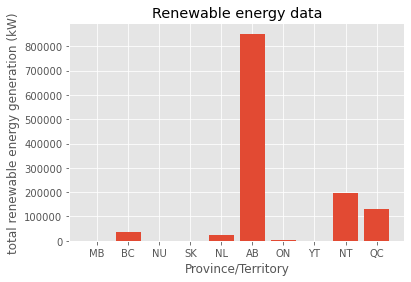

Community classification
1144864
91866


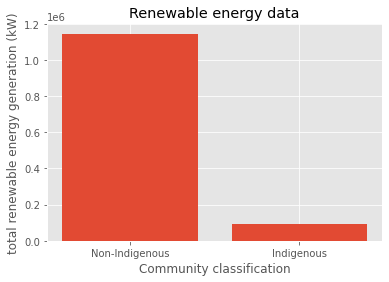

Is there year-round road access to this community?
182070
1054660


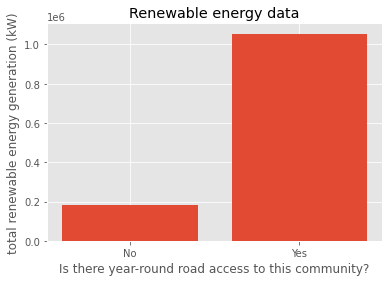

Community type
1211941
24789


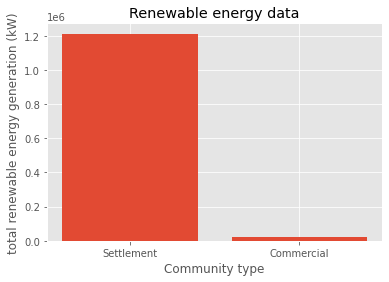

In [27]:
grids = ['single comm off', 'multi comm local', 'grid connect']
graph_map = {'Province/Territory':province_map, 'Community classification':comm_class_map,
             'Is there year-round road access to this community?':road_map, 'Community type':comms_map}

for key in graph_map:
    print(key)
    data = []
    labels = []
    
    for val in graph_map[key]:
        labels.append(val)
        energy = ren_energy_col_val(key, graph_map[key][val], new_df)
        data.append(energy)
        
   # print(type(graph_map[key]))
    plt.bar(labels, data)
    plt.title('Renewable energy data')
    plt.xlabel(key)
    plt.ylabel('total renewable energy generation (kW)')
    plt.show()

1144864
91811
55
0


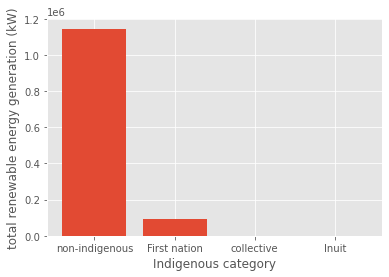

In [28]:
data = []
keys = ['non-indigenous', 'First nation', 'collective', 'Inuit']
for key in indigenous_map:
    energy = ren_energy_col_val('Indigenous category', indigenous_map[key], new_df)
    data.append(energy)
plt.bar(keys, data)
plt.xlabel('Indigenous category')
plt.ylabel('total renewable energy generation (kW)')
plt.show()

903591
154853
178286


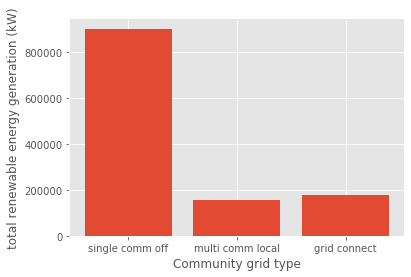

In [29]:
data = []
for key in grid_map:
    energy = ren_energy_col_val('Community record status', grid_map[key], new_df)
    data.append(energy)
plt.bar(grids, data)
plt.xlabel('Community grid type')
plt.ylabel('total renewable energy generation (kW)')
plt.show()

In [30]:
def createMap(arr):
    mpa = {}
    for i in range(len(arr)):
        mpa[arr[i]] = i
    return mpa

In [31]:
def get_renewable_energy(col):
    
    values = {}
    
    for i in range(len(new_df)):
        key = new_df.loc[i, col]
        val = new_df.loc[i, 'Total renewable energy generation (kW)']
        
        if key in values:
            values[key] += val
        else:
            values[key] = val
    return values

In [32]:
def extract_values(dct):
    data = []
    for key in dct:
        data.append(dct[key])
    return data

In [33]:
population = np.array(new_df['Population'])
renewable = np.array(new_df['Total renewable energy generation (kW)'])
print(len(population))
print(len(renewable))

276
276


In [34]:
clf = LinearRegression()
x = np.array(new_df.drop(['Total renewable energy generation (kW)'], 1))
y = np.array(new_df['Total renewable energy generation (kW)'])

In [35]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, test_size=0.20)
clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)
print(accuracy)
print(clf.coef_)
print(clf.intercept_)

-0.02853880949764309
[ 2.17954268e+02 -1.24472547e+02  1.54698020e+03 -6.95563405e+02
 -2.75745806e+01 -1.04340776e+03 -4.14320308e-02 -5.34303120e+03]
10688.105023704235


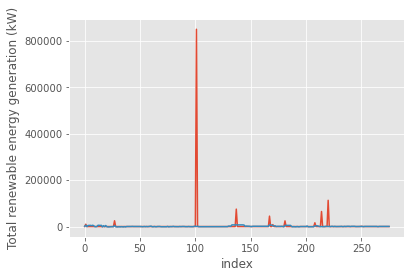

In [36]:
plt.plot(range(0,276), renewable)
#y = clf.coef_ * x + clf.intercept_
x = range(0,276)
plt.plot(x,
         clf.predict(new_df.drop(['Total renewable energy generation (kW)'], 1).loc[x]))
plt.xlabel('index')
plt.ylabel('Total renewable energy generation (kW)')
plt.show()

In [37]:
clf2 = LinearRegression()
x = np.array(new_df.drop(['Total renewable energy generation (kW)', 'Community classification', 
                             'Indigenous category'], 1))
y = np.array(new_df['Total renewable energy generation (kW)'])
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, test_size=0.20)
clf2.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 8 is different from 6)

In [48]:
mock_df = new_df.copy()
for i in range(len(mock_df)):
    #mock_df[mock_df['Community classification'] != 0, 'Community classification'] = 0
    #mock_df[mock_df['Indigenous category'] != 0, 'Indigenous category'] = 0
    mock_df.at[i,'Community classification'] = 0
    mock_df.at[i, 'Indigenous category'] = 0
mock_df.head(10)

,Province/Territory,Community record status,Community type,Community classification,Indigenous category,Is there year-round road access to this community?,Population,Main power source,Total renewable energy generation (kW)
0,9,1,0,0,0,0,12475.0,2,0.0
1,1,1,0,0,0,0,203.0,1,10000.0
2,7,2,0,0,0,1,0.0,2,0.0
3,1,1,0,0,0,0,1019.0,1,0.0
4,1,1,0,0,0,0,0.0,1,0.0
5,1,1,0,0,0,0,50.0,1,0.0
6,1,1,0,0,0,1,807.0,1,0.0
7,1,1,0,0,0,0,0.0,1,0.0
8,1,1,0,0,0,1,256.0,1,0.0
9,1,1,0,0,0,0,793.0,2,0.0


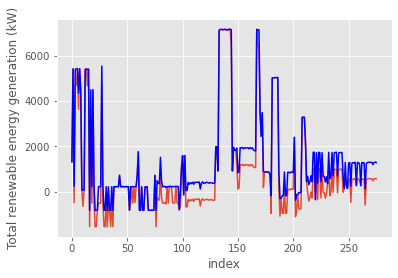

In [54]:
x = range(0,276)
plt.plot(x,
         clf.predict(new_df.drop(['Total renewable energy generation (kW)'], 1).loc[x]))

#plt.plot(x, clf2.predict(new_df.drop(['Total renewable energy generation (kW)', 'Community classification', 
                            # 'Indigenous category'], 1).loc[x]), 'g')

plt.plot(x, clf.predict(mock_df.drop(['Total renewable energy generation (kW)'], 1).loc[x]), 'b')

plt.xlabel('index')
plt.ylabel('Total renewable energy generation (kW)')
plt.show()

In [31]:
new_df.head(101)

,Province/Territory,Community record status,Community type,Community classification,Indigenous category,Is there year-round road access to this community?,Population,Main power source,Total renewable energy generation (kW)
0,5,1,1,1,0,0,12475.0,2,0.0
1,6,1,1,1,0,0,203.0,1,10000.0
2,0,2,1,0,3,1,0.0,2,0.0
3,6,1,1,0,3,0,1019.0,1,0.0
4,6,1,1,0,3,0,0.0,1,0.0
...,...,...,...,...,...,...,...,...,...
96,0,2,1,0,3,1,124.0,2,0.0
97,0,2,1,1,0,1,25085.0,2,0.0
98,7,0,1,0,3,1,38.0,2,0.0
99,7,0,1,1,0,0,853.0,2,0.0


In [32]:
################################ mean shift

In [33]:
from sklearn.cluster import MeanShift

In [33]:
X = np.array(new_df)
ms = MeanShift()
ms.fit(X)

MeanShift()

In [35]:
print(len(ms.cluster_centers_))
print(ms.cluster_centers_)
labels = ms.labels_

11
[[4.04182510e+00 3.46007605e-01 9.42965779e-01 3.68821293e-01
  1.03802281e+00 3.72623574e-01 4.59258555e+02 1.88593156e+00
  9.30660837e+00]
 [4.00000000e+00 5.00000000e-01 5.00000000e-01 1.00000000e+00
  0.00000000e+00 0.00000000e+00 3.01500000e+02 1.50000000e+00
  9.20480000e+03]
 [3.50000000e+00 5.00000000e-01 1.00000000e+00 5.00000000e-01
  1.50000000e+00 0.00000000e+00 1.01075000e+04 2.00000000e+00
  0.00000000e+00]
 [3.00000000e+00 5.00000000e-01 1.00000000e+00 5.00000000e-01
  5.00000000e-01 5.00000000e-01 4.25000000e+02 1.00000000e+00
  2.47895000e+04]
 [9.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00
  0.00000000e+00 1.00000000e+00 4.59000000e+03 2.00000000e+00
  8.51355000e+05]
 [7.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 4.28000000e+02 1.00000000e+00
  7.52740000e+04]
 [7.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 1.55000000e+02 1.00000000e+00
  4.50000000e+04]
 [6

In [36]:
num_clusters = len(ms.cluster_centers_)
renewable_dict = {}

for i in range(len(X)):
    label = labels[i]
    
    if label not in renewable_dict:
        #print('here')
        renewable_dict[label] = []
    
    #print(renewable_dict[label])
    renewable_dict[label].append(new_df.loc[i, 'Total renewable energy generation (kW)'])

final_dict = {}
    
for i in range(num_clusters):
    length = len(renewable_dict[i])
    sum = 0
    
    for el in renewable_dict[i]:
        sum += el
    final_dict[i] = (sum/length)

print(final_dict)

{0: 9.306608365019011, 1: 9204.8, 2: 0.0, 3: 24789.5, 4: 851355.0, 5: 75274.0, 6: 45000.0, 7: 113275.0, 8: 65011.0, 9: 16380.901, 10: 0.0}


In [37]:
#first cluster
for i in range(len(ms.cluster_centers_[0])):
    print(ms.cluster_centers_[0][i])
    
#province: Manitoba
#grid: single community off grid
#type: settlement
#classification: indigenous
#category: first nation
#road acces: no
#population: 459
#main power: non-renewable

#9 kw renewable 

print(ms.predict(ms.cluster_centers_[0].reshape(1,-1)))

4.0418250950570345
0.34600760456273766
0.9429657794676806
0.3688212927756654
1.038022813688213
0.3726235741444867
459.2585551330798
1.8859315589353611
9.306608365019011
[0]


In [41]:
#second cluster
for i in range(len(ms.cluster_centers_[1])):
    print(ms.cluster_centers_[1][i])   
    
#province: Manitoba
#grid: ebtween single community off grid and multi community local microgrid
#type: between commercial and settlement
#classification: non indigenous
#category: non
#road access: no
#population: 302
#main power: midway renewable and non-renewable

#2955 kW renewable

print(ms.predict(ms.cluster_centers_[1].reshape(1,-1)))

4.0
0.5
0.5
1.0
0.0
0.0
301.5
1.5
9204.8
[1]


In [42]:
#third cluster
for i in range(len(ms.cluster_centers_[2])):
    print(ms.cluster_centers_[2][i])   
    
#province: Manitoba
#grid: single community grid
#type: settlement
#classification: indigenous
#category: first nation or indigenous collective
#road access: no
#population: 10108
#main power: non-renewable

#0 kW renewable

3.5
0.5
1.0
0.5
1.5
0.0
10107.5
2.0
0.0


In [43]:
#fourth cluster
for i in range(len(ms.cluster_centers_[3])):
    print(ms.cluster_centers_[3][i])   
    
#province: Yukon Territories
#grid: single community off grid
#type: settlement
#classification: between indigenous and non-indigenous
#category: between non and first nation
#road access: no
#population: 425
#main power: renewable 

#247896 kW renewable

3.0
0.5
1.0
0.5
0.5
0.5
425.0
1.0
24789.5


In [44]:
#fifth cluster
for i in range(len(ms.cluster_centers_[4])):
    print(ms.cluster_centers_[4][i])   
    
#province: Alberta
#grid: single community off
#type: settlement
#classification: non-indigenous
#category: non
#road access: yes
#population: 4590
#main power: non renewable

# 851355 kW renewable

9.0
0.0
1.0
1.0
0.0
1.0
4590.0
2.0
851355.0


In [45]:
#sixth cluster
for i in range(len(ms.cluster_centers_[5])):
    print(ms.cluster_centers_[5][i])   
    
#province: Qeuebec
#grid: multi communiuty local microgrid
#type: settlement
#classification: non-indigenous
#category: non
#road access: no
#population: 428
#main power: renewable

# 75274 kW renewable

7.0
1.0
1.0
1.0
0.0
0.0
428.0
1.0
75274.0


In [46]:
#seventh cluster
for i in range(len(ms.cluster_centers_[6])):
    print(ms.cluster_centers_[6][i])   
    
#province: quebec
#grid: multi community record
#type: settlement
#classification: non-indigenous
#category: non
#road access: no
#population: 155
#main power: non renewable

# 45000 kW renewable

7.0
1.0
1.0
1.0
0.0
0.0
155.0
1.0
45000.0


In [47]:
#eight cluster
for i in range(len(ms.cluster_centers_[7])):
    print(ms.cluster_centers_[7][i])
    
#province: Northwest territories
#grid: Yukon NWT grid connected
#type: settlement
#classification: non-indigenous
#category: non
#road access: yes
#population: 19569
#main power: non renewable

# 113275 kW renewable

6.0
2.0
1.0
1.0
0.0
1.0
19569.0
2.0
113275.0


In [48]:
#ninth cluster
for i in range(len(ms.cluster_centers_[8])):
    print(ms.cluster_centers_[8][i])

#province: Northwest territories
#grid: Yukon NWT grid connected
#type: settlement
#classification: indigenous
#category: first nation
#road access: yes
#population: 3528
#main power: non renewable

# 65011 kW renewable

6.0
2.0
1.0
0.0
1.0
1.0
3528.0
2.0
65011.0


In [49]:
#tenth cluster
for i in range(len(ms.cluster_centers_[9])):
    print(ms.cluster_centers_[9][i])

#province: Northwest territories
#grid: single community off grid
#type: commercial
#classification: non-indigenous
#category: no
#road access: no
#population: 330
#main power: non renewable

# 16380 kW renewable

6.0
0.0
0.0
1.0
0.0
0.0
330.0
2.0
16380.901


In [50]:
#eleventh cluster
for i in range(len(ms.cluster_centers_[10])):
    print(ms.cluster_centers_[10][i])

#province: yukon territories
#grid: yukon grid connected
#type: settlement
#classification: non-indigenous
#category: no
#road access: yes
#population: 25085
#main power: non renewable

# 0 kW renewable

3.0
2.0
1.0
1.0
0.0
1.0
25085.0
2.0
0.0
